In [186]:
import os
import sys
sys.path.insert(1,os.path.abspath('../Git_Projects/0. Not_git/Sources/scikit-learn/0.23.2'))
import sklearn
print(sklearn.__version__)

0.23.2


### Load Data

In [6]:
import pandas as pd

# Input path and filename
path = 'D:/Git_Projects/5. Master_thesis/Datasets/Output_files/'

# Load files into a pandas dataframes
file = path + '2.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)

# Dependant variable
dep_var = 'Orders' 

# Set index
df = df.set_index("Date")

In [7]:
df

,Orders,CCI,CPI,Unemployment_rate,Long_term_interest_rates,Avg_Fuel_Price,TIV,Quarter,Month,Orders_lagged_12m,...,Orders_rolled_detrended_diff,CCI_diff,CCI_rolled_detrended,CCI_rolled_detrended_diff,TIV_diff,TIV_rolled_detrended,TIV_rolled_detrended_diff,Avg_Fuel_Price_diff,Avg_Fuel_Price_rolled_detrended,Avg_Fuel_Price_rolled_detrended_diff
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,998,101.06670,2.302302,7.2,4.050000,1.120000,18851,1,1,1124,...,293.500000,NaN,0.362300,NaN,NaN,5547.500000,NaN,NaN,-0.086944,NaN
2007-02-01,638,100.98060,2.184707,7.2,4.080000,1.133333,11852,1,2,1079,...,-323.250000,-0.08610,0.261283,-0.101017,-6999.0,-1368.750000,-6916.250000,0.013333,-0.069167,0.017778
2007-03-01,649,100.94160,2.574257,7.1,3.980000,1.183333,14386,1,3,1210,...,57.750000,-0.03900,0.193900,-0.067383,2534.0,1230.000000,2598.750000,0.050000,-0.019444,0.049722
2007-04-01,753,100.98700,2.561576,6.5,4.200000,1.203333,13761,2,4,1147,...,136.833333,0.04540,0.197258,0.003358,-625.0,580.916667,-649.083333,0.020000,0.003889,0.023333
2007-05-01,856,100.99110,2.362205,6.6,4.330000,1.236667,14917,2,5,1001,...,115.083333,0.00410,0.166042,-0.031217,1156.0,1870.166667,1289.250000,0.033333,0.039167,0.035278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,254,94.58021,7.616082,7.2,1.624904,2.153333,8163,3,8,256,...,136.166667,-0.38799,-3.819936,0.283843,2062.0,369.500000,2124.583333,-0.186667,0.086111,-0.225000
2022-09-01,228,94.10754,8.119296,7.3,2.420836,2.133333,7867,3,9,259,...,-23.416667,-0.47267,-3.595534,0.224402,-296.0,50.750000,-318.750000,-0.020000,0.028333,-0.057778
2022-10-01,188,93.96142,8.310766,6.4,2.894486,2.136667,7132,4,10,178,...,-40.833333,-0.14612,-3.082147,0.513387,-735.0,-648.916667,-699.666667,0.003333,0.001111,-0.027222


### Split Data

In [8]:
# Split data
steps = 36  # Number of months of testing
train = df[:-steps]
test  = df[-steps:]

print(f"Dataset length : (n={len(df)})")
print(f"Train dates    : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates     : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

start = train.index.min()
end = df.index.max()
start_test = test.index.min()

start, end, start_test

Dataset length : (n=192)
Train dates    : 2007-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=156)
Test dates     : 2020-01-01 00:00:00 --- 2022-12-01 00:00:00  (n=36)


(Timestamp('2007-01-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'))

### Pycaret

In [9]:
# Import the regression module
from pycaret.regression import *

#### Initialize

In [10]:
# Initialize setup
s = setup(    
    data = train, 
    test_data = test, 
    target = dep_var, 
    preprocess=True,  
    fold_strategy = 'timeseries', 
    transform_target = False, 
    data_split_shuffle=False,
    session_id = 42)

,Description,Value
0,session_id,42
1,Target,Orders
2,Original Data,"(156, 36)"
3,Missing Values,1
4,Numeric Features,33
5,Categorical Features,2
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(156, 48)"


In [11]:
# Review the transformed dataset
prep_pipe = get_config('prep_pipe') 
transformed_df = prep_pipe.transform(df) 

In [12]:
transformed_df.columns

Index(['CCI', 'CPI', 'Unemployment_rate', 'Long_term_interest_rates',
       'Avg_Fuel_Price', 'TIV', 'Orders_lagged_12m', 'LTIR_lagged_3m',
       'CCI_lagged_3m', 'CPI_lagged_3m', 'UR_lagged_3m', 'AFP_lagged_3m',
       'LTIR_lagged_4m', 'CCI_lagged_4m', 'CPI_lagged_4m', 'UR_lagged_4m',
       'AFP_lagged_4m', 'LTIR_lagged_5m', 'CCI_lagged_5m', 'CPI_lagged_5m',
       'UR_lagged_5m', 'AFP_lagged_5m', 'Orders_rolled_detrended',
       'Orders_rolled_detrended_diff', 'CCI_diff', 'CCI_rolled_detrended',
       'CCI_rolled_detrended_diff', 'TIV_diff', 'TIV_rolled_detrended',
       'Avg_Fuel_Price_diff', 'Avg_Fuel_Price_rolled_detrended',
       'Avg_Fuel_Price_rolled_detrended_diff', 'Quarter_1', 'Quarter_2',
       'Quarter_3', 'Quarter_4', 'Month_1', 'Month_10', 'Month_11', 'Month_12',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9'],
      dtype='object')

In [13]:
df.columns

Index(['Orders', 'CCI', 'CPI', 'Unemployment_rate', 'Long_term_interest_rates',
       'Avg_Fuel_Price', 'TIV', 'Quarter', 'Month', 'Orders_lagged_12m',
       'LTIR_lagged_3m', 'CCI_lagged_3m', 'CPI_lagged_3m', 'UR_lagged_3m',
       'AFP_lagged_3m', 'LTIR_lagged_4m', 'CCI_lagged_4m', 'CPI_lagged_4m',
       'UR_lagged_4m', 'AFP_lagged_4m', 'LTIR_lagged_5m', 'CCI_lagged_5m',
       'CPI_lagged_5m', 'UR_lagged_5m', 'AFP_lagged_5m',
       'Orders_rolled_detrended', 'Orders_rolled_detrended_diff', 'CCI_diff',
       'CCI_rolled_detrended', 'CCI_rolled_detrended_diff', 'TIV_diff',
       'TIV_rolled_detrended', 'TIV_rolled_detrended_diff',
       'Avg_Fuel_Price_diff', 'Avg_Fuel_Price_rolled_detrended',
       'Avg_Fuel_Price_rolled_detrended_diff'],
      dtype='object')

#### Model comparison

In [14]:
# Train and evaluate models
exclude_list = ['dummy', 'br', 'knn', 'en', 'omp', 'huber', 'ridge', 'llar', 'lasso', 'lr']
#exclude_list = []
best = compare_models(exclude = exclude_list, sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,99.6725,18239.5639,126.3560,0.2055,0.2188,0.1947,0.0640
xgboost,Extreme Gradient Boosting,101.5372,17490.4303,128.0874,0.2306,0.2273,0.1873,0.0410
ada,AdaBoost Regressor,101.6280,18058.0514,126.4735,0.2627,0.2240,0.1932,0.0230
gbr,Gradient Boosting Regressor,105.8431,20970.2783,134.3136,0.0483,0.2234,0.1999,0.0230
et,Extra Trees Regressor,106.1826,19257.9977,131.8048,0.1427,0.2285,0.2100,0.0490
dt,Decision Tree Regressor,117.1929,23056.2214,146.4312,-0.0171,0.2699,0.2284,0.0100
lightgbm,Light Gradient Boosting Machine,121.8533,26120.7413,147.0878,-0.0555,0.2838,0.2738,0.2360
par,Passive Aggressive Regressor,124.5902,23641.6330,145.2427,-0.3996,0.2677,0.2372,0.5320
lar,Least Angle Regression,435066090795889024.0000,3584858543811890538889112873473146880.0000,599070446906218240.0000,-109764336348510717992882443124736.0000,10.0776,1208197541597555.0000,1.0880


#### Create best model

In [15]:
# Create model
model = create_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,191.8714,51371.4494,226.6527,-0.5729,0.4978,0.5759
1,98.6079,13949.2030,118.1067,0.4042,0.2363,0.2216
2,128.1243,22978.0014,151.5850,-0.0762,0.2254,0.1759
3,140.8407,32108.6821,179.1890,0.4924,0.2899,0.2167
4,83.3414,14025.8255,118.4307,-0.7163,0.2116,0.1707
5,99.2207,21078.0273,145.1827,0.3873,0.1964,0.1406
6,66.6564,5952.9582,77.1554,0.7277,0.1171,0.0973
7,54.3029,5162.0995,71.8478,0.6483,0.1090,0.0825
8,46.8421,5450.8847,73.8301,0.8279,0.1059,0.0733


#### Tune model

In [16]:
# Tune model
tuned_model = tune_model(model, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,181.2303,45950.0152,214.3595,-0.4069,0.5181,0.5941
1,93.5907,12812.7803,113.1936,0.4528,0.2298,0.2143
2,120.9162,20823.9791,144.3052,0.0247,0.2119,0.1658
3,147.6128,34061.0917,184.5565,0.4616,0.3054,0.2288
4,84.5020,13830.6126,117.6036,-0.6924,0.2105,0.1719
5,98.4359,21767.8707,147.5394,0.3672,0.2025,0.1414
6,58.1033,4950.2096,70.3577,0.7735,0.1005,0.0824
7,63.9119,6368.8866,79.8053,0.5661,0.1175,0.0949
8,57.0009,6005.9177,77.4979,0.8104,0.1170,0.0902


In [17]:
tuned_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.3,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=190, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [18]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Plot model

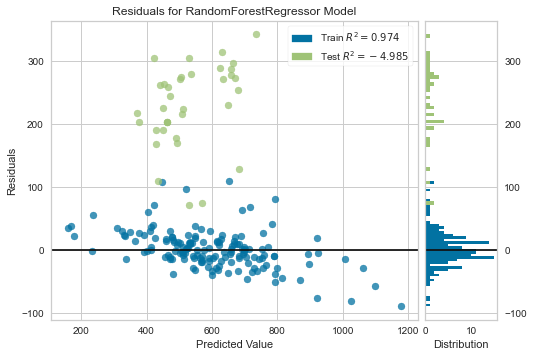

In [19]:
# PLot model - Residual plot
plot_model(model)

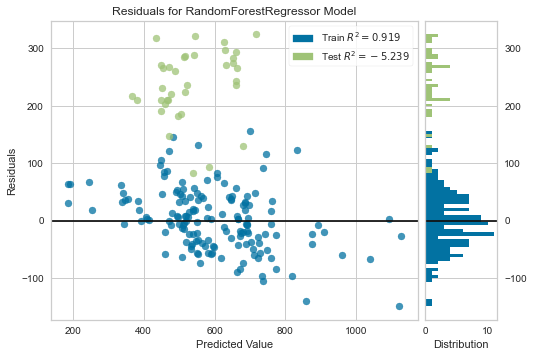

In [20]:
# PLot model - Residual plot
plot_model(tuned_model)

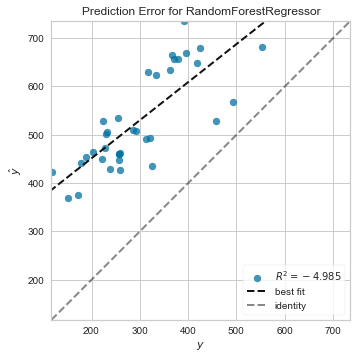

In [21]:
# Prediction Error Plot
plot_model(model, plot = 'error')

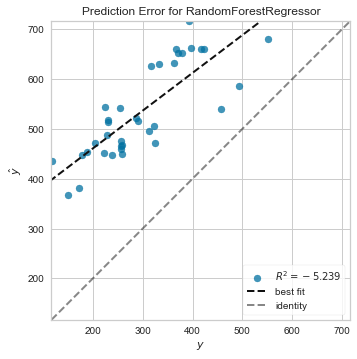

In [22]:
# Prediction Error Plot
plot_model(tuned_model, plot = 'error')

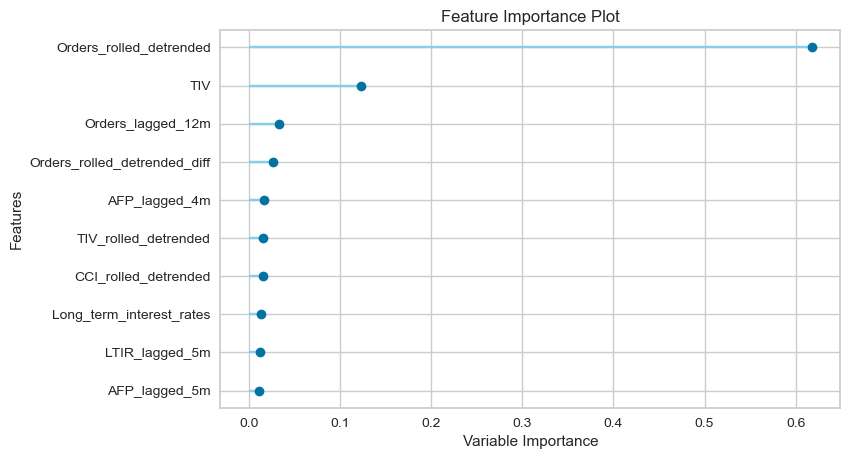

In [23]:
# Feature Importance Plot
plot_model(model, plot='feature')

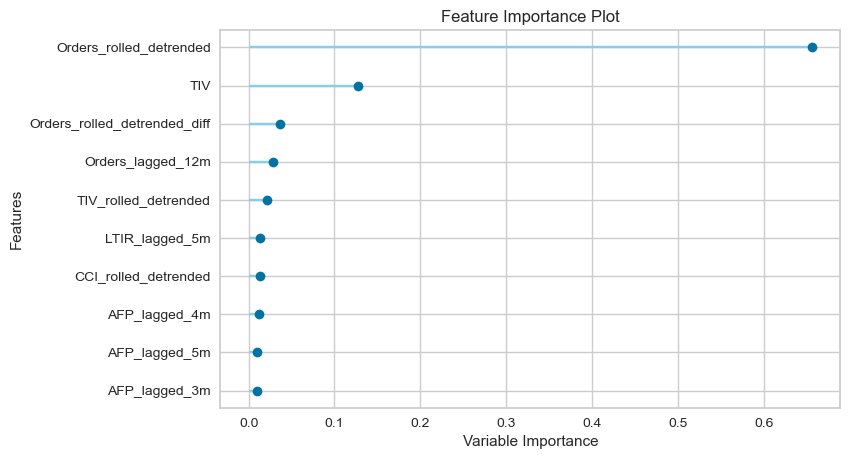

In [24]:
# Feature Importance Plot
plot_model(tuned_model, plot='feature')

#### Evaluate models

In [25]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Predict on test set

In [27]:
prediction = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,230.6044,57304.3761,239.3833,-4.9851,0.6487,0.8907


In [28]:
prediction_tuned = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,237.0922,59732.6383,244.4026,-5.2387,0.6620,0.9181


#### Predict full dataset

##### Base model

In [29]:
import plotly.express as px
# Generate predictions on the original dataset
predictions = predict_model(model, data=df)

# Add a date column in the dataset
predictions['Date'] = pd.date_range(start=start, end = end, freq = 'MS')

# Line plot
fig = px.line(predictions, x='Date', y=[dep_var, "Label"]) #, template = 'plotly_dark')

# Add a vertical rectange for test-set separation
fig.add_vrect(x0=start_test, x1=predictions.Date.max(), fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,61.1792,11505.1796,107.2622,0.7408,0.2873,0.2034


##### Tuned model

In [30]:
import plotly.express as px
# Generate predictions on the original dataset
predictions = predict_model(tuned_model, data=df)

# Add a date column in the dataset
predictions['Date'] = pd.date_range(start=start, end = end, freq = 'MS')

# Line plot
fig = px.line(predictions, x='Date', y=[dep_var, "Label"]) #, template = 'plotly_dark')

# Add a vertical rectange for test-set separation
fig.add_vrect(x0=start_test, x1=predictions.Date.max(), fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,78.9511,13567.2646,116.4786,0.6944,0.3032,0.2403


#### Finalize model

In [218]:
# Finalize the model i.e. train the best model on the entire dataset (this time, including the test set).
final = finalize_model(tuned_model)

In [219]:
final

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=270, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', ...)